In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout,MaxPool2D,Conv2D
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import random
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/New folder/Brain_Data_Organised'
classes = os.listdir(path)
print(classes)

['Normal', 'Stroke']


In [ ]:
def preprocess(img_path):
    try:
        # Attempt to read the image
        image = cv2.imread(img_path)

        # Check if the image is empty
        if image is None:
            raise Exception(f"Error: Unable to read image at {img_path}")

        # Resize the image
        img = cv2.resize(image, (224, 224),interpolation=cv2.INTER_AREA)  # Adjust the target size as needed

        # Convert to grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        return img

    except Exception as e:
        print(f"Error during preprocessing: {e}")
        return None  # Return None in case of an error

In [ ]:
img = []
label = []
# encoder = LabelEncoder()
# encoder.fit(classes)
for class_label in classes:
  class_path = os.path.join(path,class_label)
  i = 0

  for filename in (os.listdir(class_path)):
    img_path = os.path.join(class_path,filename)
    image = preprocess(img_path)
    img.append(image)
    label.append(class_label)
    i+=1
    if i == 1000:
      break
# actual_label = label
# labels_encoded = encoder.transform(label)
# images = np.array(img)
# labels = np.array(labels_encoded)
# mapping = {encoded : label for encoded,label in zip(labels_encoded,actual_label)}
# print(mapping)

actual_label = label
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(actual_label)
images = np.array(img)
labels = np.array(labels_encoded)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)


{'Normal': 0, 'Stroke': 1}


In [ ]:
images.shape

(1950, 224, 224)

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(images,labels,random_state = 28,shuffle = True,test_size=0.25)

In [ ]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((1462, 224, 224), (1462,), (488, 224, 224), (488,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define your model
model = Sequential()

# Block 1
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Block 2
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Block 3
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_data=(xtest, ytest))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(xtest, ytest)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
46/46 [==============================] - 7s 53ms/step - loss: 9.4198 - accuracy: 0.4966 - val_loss: 0.7077 - val_accuracy: 0.4980
Epoch 2/20
46/46 [==============================] - 2s 44ms/step - loss: 0.7016 - accuracy: 0.5048 - val_loss: 0.7005 - val_accuracy: 0.4980
Epoch 3/20
46/46 [==============================] - 2s 40ms/step - loss: 0.7084 - accuracy: 0.5185 - val_loss: 0.6908 - val_accuracy: 0.5123
Epoch 4/20
46/46 [==============================] - 2s 39ms/step - loss: 0.7049 - accuracy: 0.5144 - val_loss: 0.6885 - val_accuracy: 0.5410
Epoch 5/20
46/46 [==============================] - 2s 39ms/step - loss: 0.6643 - accuracy: 0.5978 - val_loss: 0.6560 - val_accuracy: 0.5881
Epoch 6/20
46/46 [==============================] - 2s 39ms/step - loss: 0.6020 - accuracy: 0.6560 - val_loss: 0.5636 - val_accuracy: 0.7336
Epoch 7/20
46/46 [==============================] - 2s 44ms/step - loss: 0.5149 - accuracy: 0.7490 - val_loss: 0.5911 - val_accuracy: 0.7131
Epoch 8/20
46

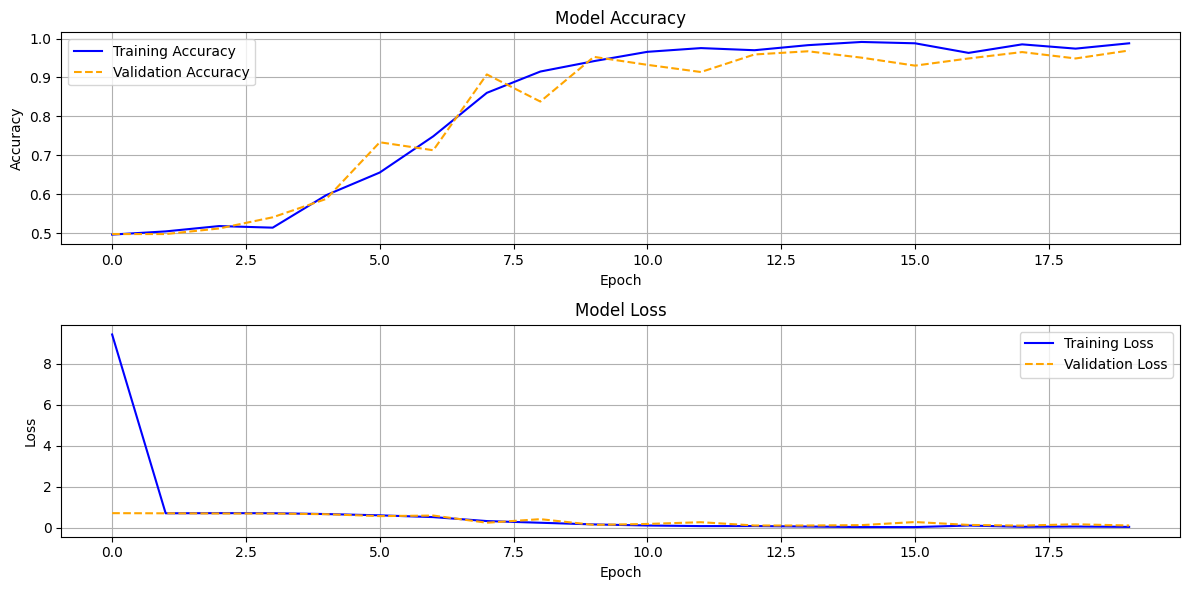

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Assuming 'hist' contains the history object returned by model.fit()
plot_history(hist)


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

16/16 [==============================] - 0s 12ms/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
accuracy_score(ytest,ypred)

0.9692622950819673

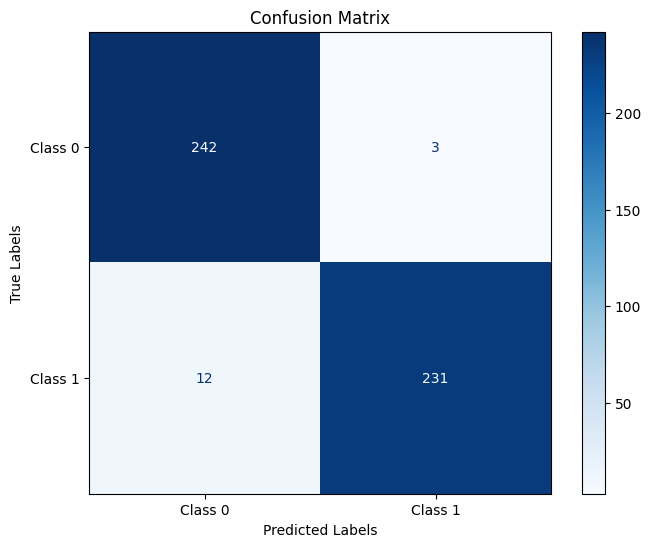

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming cf is the confusion matrix and ytest, ypred are true and predicted labels
cf = confusion_matrix(y_true=ytest, y_pred=ypred)

# Create ConfusionMatrixDisplay object
x = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=["Class 0", "Class 1"])  # Add display labels as needed

# Plot the confusion matrix with modifications
fig, ax = plt.subplots(figsize=(8, 6))
x.plot(ax=ax, cmap=plt.cm.Blues)  # Change cmap for a different color scheme
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.grid(False)
plt.show()


#ResNet-18

In [ ]:
from keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input
from keras.models import Model
from keras.utils import to_categorical



def conv_block(input_tensor, filters, kernel_size, strides=(1, 1), padding='same'):
    x = Conv2D(filters, kernel_size, strides=strides, padding=padding)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def identity_block(input_tensor, filters, kernel_size, strides=(1, 1), padding='same'):
    x = Conv2D(filters, kernel_size, strides=strides, padding=padding)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size, padding=padding)(x)
    x = BatchNormalization()(x)
    x = Add()([x, input_tensor])
    x = Activation('relu')(x)
    return x

def ResNet18(input_shape=(224, 224, 1), num_classes=2):
    input_img = Input(shape=input_shape)

    x = conv_block(input_img, 64, (7, 7), strides=(2, 2), padding='same')
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = conv_block(x, 64, (3, 3))
    x = identity_block(x, 64, (3, 3))
    x = identity_block(x, 64, (3, 3))

    x = conv_block(x, 128, (3, 3), strides=(2, 2), padding='same')
    x = identity_block(x, 128, (3, 3))
    x = identity_block(x, 128, (3, 3))

    x = conv_block(x, 256, (3, 3), strides=(2, 2), padding='same')
    x = identity_block(x, 256, (3, 3))
    x = identity_block(x, 256, (3, 3))

    x = conv_block(x, 512, (3, 3), strides=(2, 2), padding='same')
    x = identity_block(x, 512, (3, 3))
    x = identity_block(x, 512, (3, 3))

    x = AveragePooling2D((7, 7), name='avg_pool')(x)
    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_img, outputs=x, name='resnet18')
    return model

# Create ResNet-18 model with input shape (224, 224, 1)
resnet_model = ResNet18(input_shape=(224, 224, 1))
resnet_model.summary()


# Create ResNet-18 model
model = ResNet18()
model.summary()


Model: "resnet18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 112, 112, 64)         3200      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 64)         256       ['conv2d_10[0][0]']           
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 112, 112, 64)         0         ['batch_normalization[0

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define ResNet-18 model
model = ResNet18()

# Compile the model
optimizer = Adam()  # Define optimizer (e.g., Adam)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",    # Monitor validation loss
    min_delta=0.00001,     # Minimum change to qualify as an improvement
    patience=20,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode (1: update messages)
    mode="auto",           # Direction of improvement ('auto', 'min', 'max')
    restore_best_weights=False  # Whether to restore model weights to the best epoch
)


In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
46/46 [==============================] - 19s 143ms/step - loss: 1.2088 - accuracy: 0.5301 - val_loss: 56.3081 - val_accuracy: 0.5020
Epoch 2/20
46/46 [==============================] - 6s 130ms/step - loss: 0.6246 - accuracy: 0.6601 - val_loss: 7.2628 - val_accuracy: 0.5020
Epoch 3/20
46/46 [==============================] - 6s 127ms/step - loss: 0.5849 - accuracy: 0.6902 - val_loss: 50.3555 - val_accuracy: 0.5020
Epoch 4/20
46/46 [==============================] - 6s 132ms/step - loss: 0.5520 - accuracy: 0.7285 - val_loss: 35.7303 - val_accuracy: 0.5020
Epoch 5/20
46/46 [==============================] - 6s 130ms/step - loss: 0.4949 - accuracy: 0.7551 - val_loss: 16.2175 - val_accuracy: 0.5020
Epoch 6/20
46/46 [==============================] - 6s 130ms/step - loss: 0.3989 - accuracy: 0.8215 - val_loss: 5.3505 - val_accuracy: 0.5020
Epoch 7/20
46/46 [==============================] - 6s 131ms/step - loss: 0.3426 - accuracy: 0.8475 - val_loss: 11.0082 - val_accuracy: 0.5020


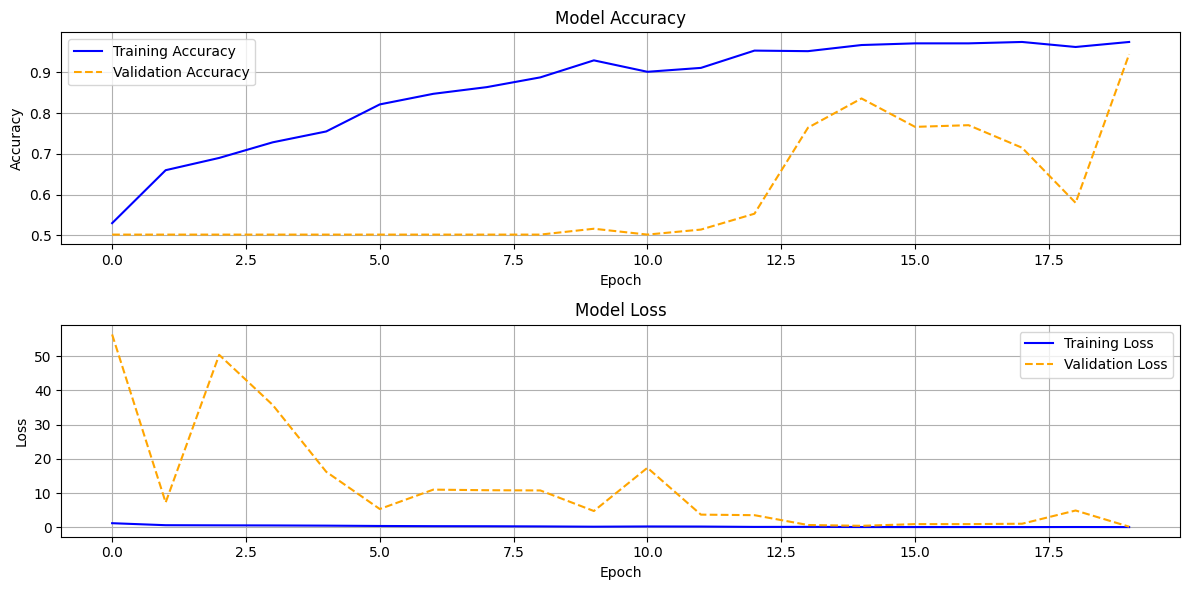

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Assuming 'hist' contains the history object returned by model.fit()
plot_history(hist)


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

16/16 [==============================] - 1s 40ms/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
accuracy_score(ytest,ypred)

0.944672131147541

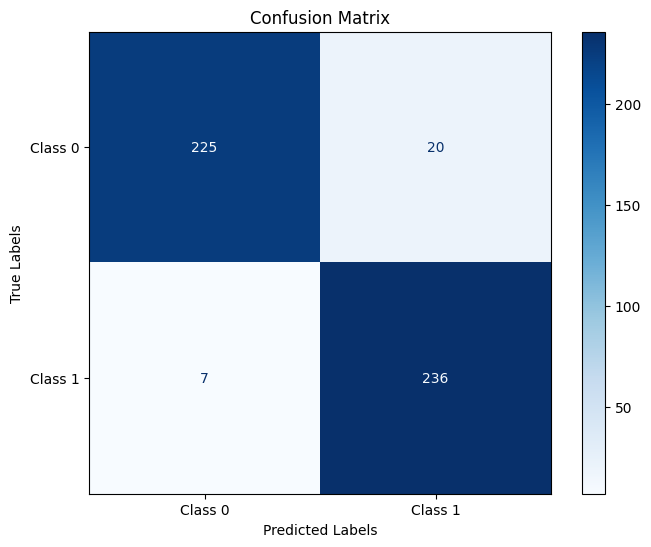

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming cf is the confusion matrix and ytest, ypred are true and predicted labels
cf = confusion_matrix(y_true=ytest, y_pred=ypred)

# Create ConfusionMatrixDisplay object
x = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=["Class 0", "Class 1"])  # Add display labels as needed

# Plot the confusion matrix with modifications
fig, ax = plt.subplots(figsize=(8, 6))
x.plot(ax=ax, cmap=plt.cm.Blues)  # Change cmap for a different color scheme
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.grid(False)
plt.show()


#GoogLe Net

In [ ]:
import tensorflow
from keras import layers, models
from keras.layers import Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, AveragePooling2D, Flatten, Dense, Input, Concatenate

from keras.models import Model
from keras.utils import to_categorical


def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)

    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)

    output = Concatenate(axis=-1)([conv_1x1, conv_3x3, conv_5x5, pool_proj])
    return output

def GoogLeNet(input_shape=(224, 224, 1), num_classes=2):
    input_img = Input(shape=input_shape)

    # First Convolutional Layer
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(input_img)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Second Convolutional Layer
    x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception Modules
    x = inception_module(x, 64, 96, 128, 16, 32, 32)
    x = inception_module(x, 128, 128, 192, 32, 96, 64)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_module(x, 192, 96, 208, 16, 48, 64)
    x = inception_module(x, 160, 112, 224, 24, 64, 64)
    x = inception_module(x, 128, 128, 256, 24, 64, 64)
    x = inception_module(x, 112, 144, 288, 32, 64, 64)
    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = inception_module(x, 256, 160, 320, 32, 128, 128)
    x = inception_module(x, 384, 192, 384, 48, 128, 128)

    # Average Pooling and Dropout
    x = AveragePooling2D((7, 7))(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)

    # Output Layer
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_img, outputs=x, name='googlenet')
    return model

# Create GoogLeNet model with input shape (224, 224, 1)
googlenet_model = GoogLeNet(input_shape=(224, 224, 1))
googlenet_model.summary()


Model: "googlenet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_421 (Conv2D)         (None, 112, 112, 64)         3200      ['input_19[0][0]']            
                                                                                                  
 max_pooling2d_88 (MaxPooli  (None, 56, 56, 64)           0         ['conv2d_421[0][0]']          
 ng2D)                                                                                            
                                                                                                  
 conv2d_422 (Conv2D)         (None, 56, 56, 64)           4160      ['max_pooling2d_88[0][

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define GoogLe Net model
model = GoogLeNet()

# Compile the model
optimizer = Adam()  # Define optimizer (e.g., Adam)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",    # Monitor validation loss
    min_delta=0.00001,     # Minimum change to qualify as an improvement
    patience=20,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode (1: update messages)
    mode="auto",           # Direction of improvement ('auto', 'min', 'max')
    restore_best_weights=False  # Whether to restore model weights to the best epoch
)


In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
46/46 [==============================] - 23s 120ms/step - loss: 1.6482 - accuracy: 0.4986 - val_loss: 0.7071 - val_accuracy: 0.5020
Epoch 2/20
46/46 [==============================] - 5s 107ms/step - loss: 0.7132 - accuracy: 0.5212 - val_loss: 0.6958 - val_accuracy: 0.5020
Epoch 3/20
46/46 [==============================] - 5s 106ms/step - loss: 0.7119 - accuracy: 0.5150 - val_loss: 0.7132 - val_accuracy: 0.5020
Epoch 4/20
46/46 [==============================] - 5s 111ms/step - loss: 0.7121 - accuracy: 0.4959 - val_loss: 0.7074 - val_accuracy: 0.5020
Epoch 5/20
46/46 [==============================] - 5s 111ms/step - loss: 0.7007 - accuracy: 0.5198 - val_loss: 0.6976 - val_accuracy: 0.4980
Epoch 6/20
46/46 [==============================] - 5s 107ms/step - loss: 0.7130 - accuracy: 0.4918 - val_loss: 0.6936 - val_accuracy: 0.5020
Epoch 7/20
46/46 [==============================] - 5s 108ms/step - loss: 0.6999 - accuracy: 0.5021 - val_loss: 0.6801 - val_accuracy: 0.5615
Epoch

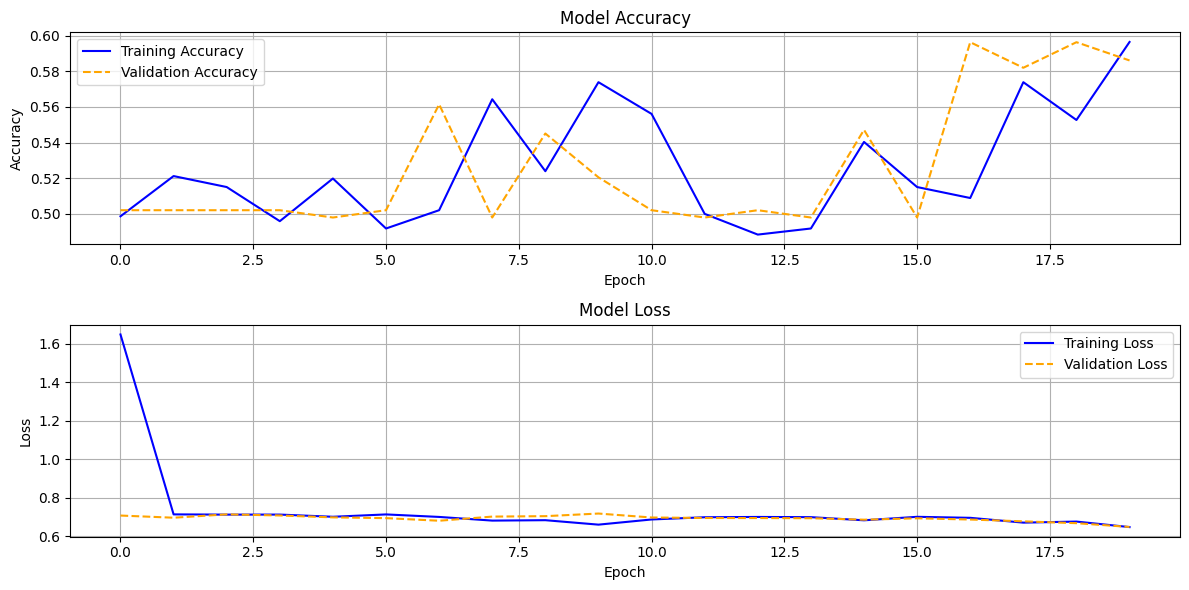

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Assuming 'hist' contains the history object returned by model.fit()
plot_history(hist)


In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

16/16 [==============================] - 1s 32ms/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest,ypred)

0.5860655737704918

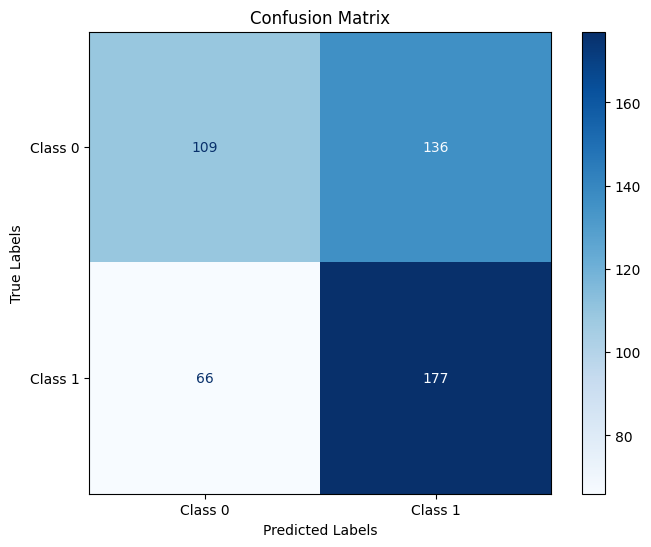

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming cf is the confusion matrix and ytest, ypred are true and predicted labels
cf = confusion_matrix(y_true=ytest, y_pred=ypred)

# Create ConfusionMatrixDisplay object
x = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=["Class 0", "Class 1"])  # Add display labels as needed

# Plot the confusion matrix with modifications
fig, ax = plt.subplots(figsize=(8, 6))
x.plot(ax=ax, cmap=plt.cm.Blues)  # Change cmap for a different color scheme
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.grid(False)
plt.show()


#VGG-16

In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your data directory
data_dir = '/content/drive/MyDrive/Brain_Data_Organised'

# Set the image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Create an ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split data into training (80%) and validation (20%)
)

# Generate training data from the images in the specified directory
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    subset='training'  # Use training data
)

# Generate validation data from the images in the specified directory
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Use validation data
)

# Load the VGG16 model (without top classification layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Save the trained model
model.save('vgg16_image_classification_model.h5')


Found 2001 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/20
63/63 [==============================] - 26s 383ms/step - loss: 1.1447 - accuracy: 0.6662 - val_loss: 0.6331 - val_accuracy: 0.6940
Epoch 2/20
63/63 [==============================] - 16s 247ms/step - loss: 0.3403 - accuracy: 0.8616 - val_loss: 0.7234 - val_accuracy: 0.6380
Epoch 3/20
63/63 [==============================] - 16s 247ms/step - loss: 0.2322 - accuracy: 0.9110 - val_loss: 0.7805 - val_accuracy: 0.6840
Epoch 4/20
63/63 [==============================] - 17s 262ms/step - loss: 0.1291 - accuracy: 0.9740 - val_loss: 0.7711 - val_accuracy: 0.7340
Epoch 5/20
63/63 [==============================] - 15s 243ms/step - loss: 0.1074 - accuracy: 0.9740 - val_loss: 0.8305 - val_accuracy: 0.7200
Epoch 6/20
63/63 [==============================] - 16s 255ms/step - loss: 0.0796 - accuracy: 0.9845 - val_loss: 0.8886 - val_accuracy: 0

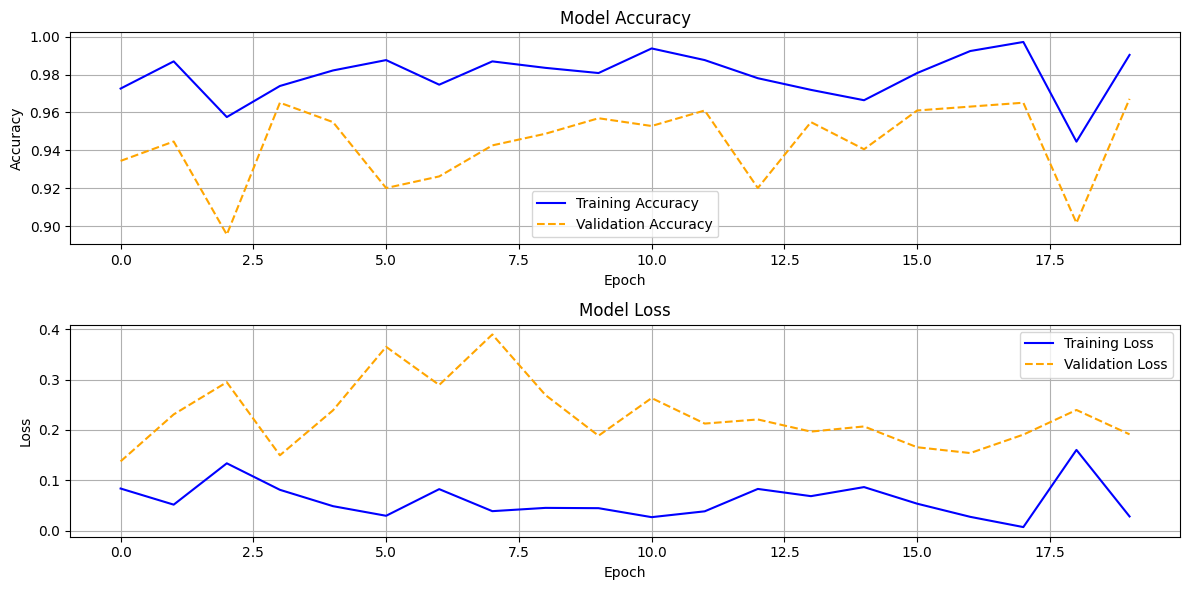

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Assuming 'hist' contains the history object returned by model.fit()
plot_history(hist)


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest,ypred)

0.930327868852459

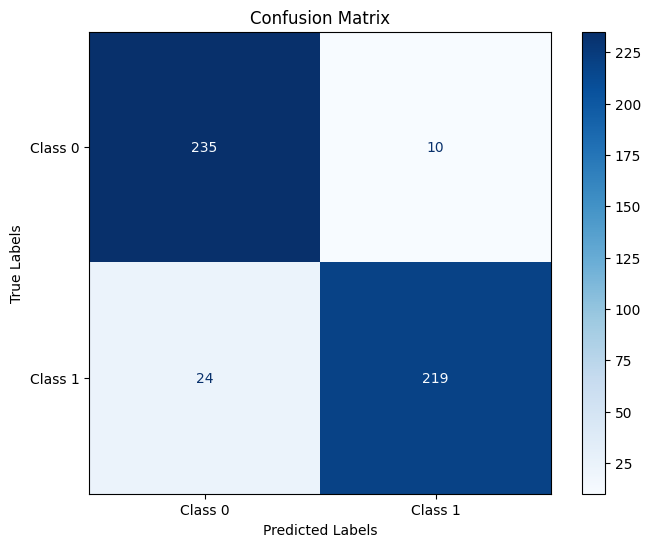

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming cf is the confusion matrix and ytest, ypred are true and predicted labels
cf = confusion_matrix(y_true=ytest, y_pred=ypred)

# Create ConfusionMatrixDisplay object
x = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=["Class 0", "Class 1"])  # Add display labels as needed

# Plot the confusion matrix with modifications
fig, ax = plt.subplots(figsize=(8, 6))
x.plot(ax=ax, cmap=plt.cm.Blues)  # Change cmap for a different color scheme
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.grid(False)
plt.show()


#Inception V3

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate, AveragePooling2D, Flatten, Dense
from keras.models import Model

def InceptionV3(input_shape=(224, 224, 1), num_classes=2):
    input_img = Input(shape=input_shape)

    # Stem
    x = Conv2D(32, (3, 3), strides=(2, 2), activation='relu', padding='valid')(input_img)
    x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Inception blocks
    x = inception_block(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_block(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    # Add more inception blocks here...

    # Classification head
    x = AveragePooling2D((4, 4))(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_img, outputs=x, name='inceptionv3')
    return model

def inception_block(x, filters):
    """
    Creates an Inception block with parallel convolutions.
    """
    branch1x1 = Conv2D(filters[0], (1, 1), activation='relu')(x)

    branch3x3 = Conv2D(filters[1], (1, 1), activation='relu')(x)
    branch3x3 = Conv2D(filters[2], (3, 3), activation='relu', padding='same')(branch3x3)

    branch5x5 = Conv2D(filters[3], (1, 1), activation='relu')(x)
    branch5x5 = Conv2D(filters[4], (5, 5), activation='relu', padding='same')(branch5x5)

    branch_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters[5], (1, 1), activation='relu')(branch_pool)

    return concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)

# Create InceptionV3 model with input shape (224, 224, 1)
inceptionv3_model = InceptionV3(input_shape=(224, 224, 1))
inceptionv3_model.summary()


Model: "inceptionv3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_236 (Conv2D)         (None, 111, 111, 32)         320       ['input_15[0][0]']            
                                                                                                  
 conv2d_237 (Conv2D)         (None, 109, 109, 32)         9248      ['conv2d_236[0][0]']          
                                                                                                  
 conv2d_238 (Conv2D)         (None, 109, 109, 64)         18496     ['conv2d_237[0][0]']          
                                                                                        

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

model = InceptionV3()

# Compile the model
optimizer = Adam()  # Define optimizer (e.g., Adam)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",    # Monitor validation loss
    min_delta=0.00001,     # Minimum change to qualify as an improvement
    patience=20,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode (1: update messages)
    mode="auto",           # Direction of improvement ('auto', 'min', 'max')
    restore_best_weights=False  # Whether to restore model weights to the best epoch
)


In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
46/46 [==============================] - 14s 153ms/step - loss: 3.9796 - accuracy: 0.5260 - val_loss: 0.6729 - val_accuracy: 0.5656
Epoch 2/20
46/46 [==============================] - 6s 133ms/step - loss: 0.6424 - accuracy: 0.6163 - val_loss: 0.6558 - val_accuracy: 0.5902
Epoch 3/20
46/46 [==============================] - 6s 133ms/step - loss: 0.5856 - accuracy: 0.6915 - val_loss: 0.5377 - val_accuracy: 0.7418
Epoch 4/20
46/46 [==============================] - 6s 134ms/step - loss: 0.4747 - accuracy: 0.7674 - val_loss: 0.4374 - val_accuracy: 0.7869
Epoch 5/20
46/46 [==============================] - 6s 135ms/step - loss: 0.4068 - accuracy: 0.8112 - val_loss: 0.3608 - val_accuracy: 0.8402
Epoch 6/20
46/46 [==============================] - 6s 137ms/step - loss: 0.3226 - accuracy: 0.8584 - val_loss: 0.3370 - val_accuracy: 0.8463
Epoch 7/20
46/46 [==============================] - 6s 134ms/step - loss: 0.2418 - accuracy: 0.9097 - val_loss: 0.2995 - val_accuracy: 0.8689
Epoch

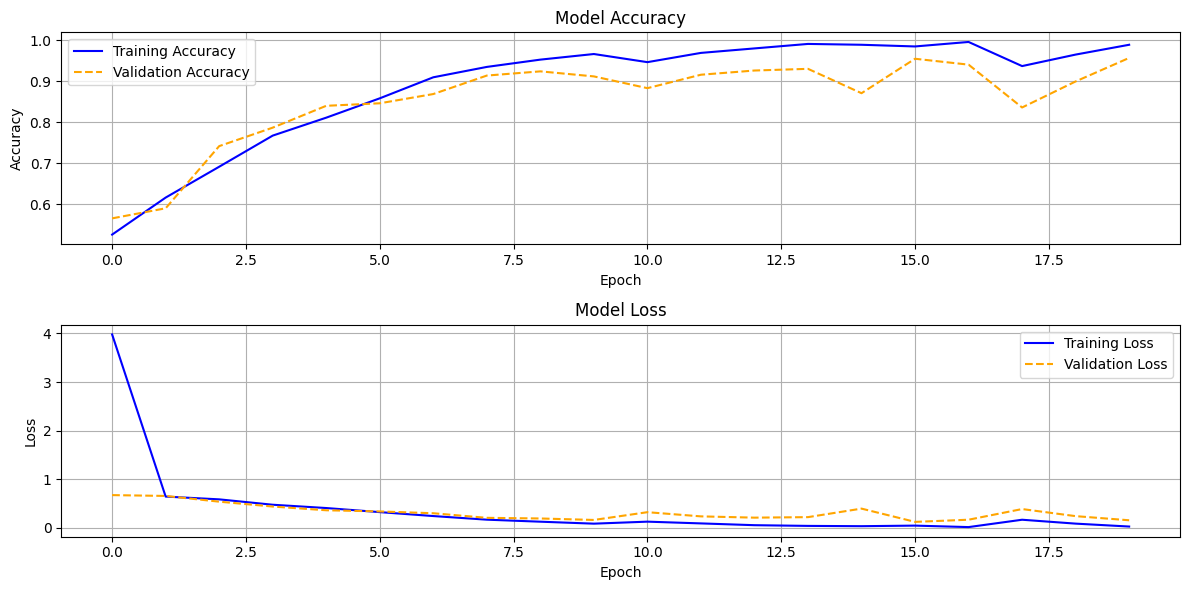

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Assuming 'hist' contains the history object returned by model.fit()
plot_history(hist)


In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

16/16 [==============================] - 1s 38ms/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest,ypred)

0.9569672131147541

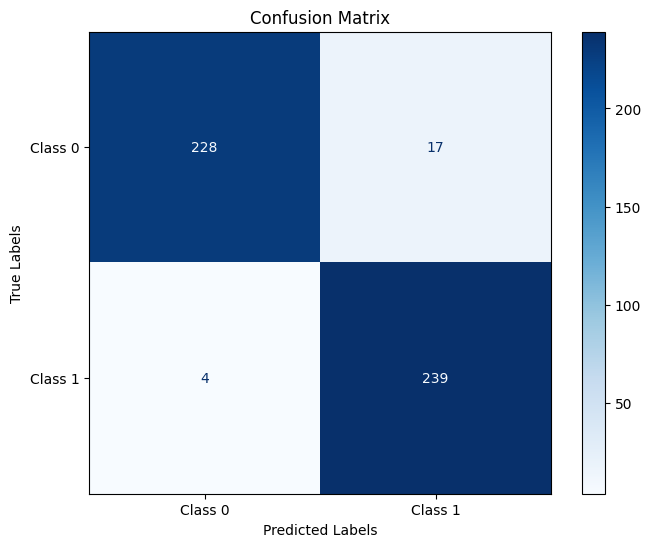

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming cf is the confusion matrix and ytest, ypred are true and predicted labels
cf = confusion_matrix(y_true=ytest, y_pred=ypred)

# Create ConfusionMatrixDisplay object
x = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=["Class 0", "Class 1"])  # Add display labels as needed

# Plot the confusion matrix with modifications
fig, ax = plt.subplots(figsize=(8, 6))
x.plot(ax=ax, cmap=plt.cm.Blues)  # Change cmap for a different color scheme
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.grid(False)
plt.show()


#Squeezenet

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Flatten, Activation
from keras.models import Model

def SqueezeNet(input_shape=(224, 224, 1), num_classes=2):
    input_img = Input(shape=input_shape)

    # Convolutional layers
    x = Conv2D(64, (3, 3), activation='relu', padding='valid', strides=(2, 2))(input_img)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

    # Fire modules
    x = fire_module(x, squeeze=16, expand=64)
    x = fire_module(x, squeeze=16, expand=64)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
    x = fire_module(x, squeeze=32, expand=128)
    x = fire_module(x, squeeze=32, expand=128)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)
    x = fire_module(x, squeeze=48, expand=192)
    x = fire_module(x, squeeze=48, expand=192)
    x = fire_module(x, squeeze=64, expand=256)
    x = fire_module(x, squeeze=64, expand=256)

    # Classification head
    x = Conv2D(num_classes, (1, 1), activation='relu', padding='valid')(x)
    x = AveragePooling2D(pool_size=(13, 13))(x)
    x = Flatten()(x)
    x = Activation('softmax')(x)

    model = Model(inputs=input_img, outputs=x, name='squeezenet')
    return model

def fire_module(x, squeeze, expand):
    """
    Creates a Fire module consisting of squeeze and expand layers.
    """
    squeezed = Conv2D(squeeze, (1, 1), activation='relu', padding='valid')(x)

    expanded_1x1 = Conv2D(expand, (1, 1), activation='relu', padding='valid')(squeezed)
    expanded_3x3 = Conv2D(expand, (3, 3), activation='relu', padding='same')(squeezed)

    output = concatenate([expanded_1x1, expanded_3x3], axis=-1)
    return output

# Create SqueezeNet model with input shape (224, 224, 1)
squeezenet_model = SqueezeNet(input_shape=(224, 224, 1))
squeezenet_model.summary()


Model: "squeezenet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_291 (Conv2D)         (None, 111, 111, 64)         640       ['input_13[0][0]']            
                                                                                                  
 max_pooling2d_68 (MaxPooli  (None, 55, 55, 64)           0         ['conv2d_291[0][0]']          
 ng2D)                                                                                            
                                                                                                  
 conv2d_292 (Conv2D)         (None, 55, 55, 16)           1040      ['max_pooling2d_68[0]

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define SqueezeNet model
model = SqueezeNet()

# Compile the model
optimizer = Adam()  # Define optimizer (e.g., Adam)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor="val_loss",    # Monitor validation loss
    min_delta=0.00001,     # Minimum change to qualify as an improvement
    patience=20,           # Number of epochs with no improvement after which training will be stopped
    verbose=1,             # Verbosity mode (1: update messages)
    mode="auto",           # Direction of improvement ('auto', 'min', 'max')
    restore_best_weights=False  # Whether to restore model weights to the best epoch
)


In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
46/46 [==============================] - 18s 119ms/step - loss: 1.2092 - accuracy: 0.4761 - val_loss: 0.7438 - val_accuracy: 0.4980
Epoch 2/20
46/46 [==============================] - 2s 50ms/step - loss: 0.7259 - accuracy: 0.4938 - val_loss: 0.6990 - val_accuracy: 0.5020
Epoch 3/20
46/46 [==============================] - 2s 51ms/step - loss: 0.7075 - accuracy: 0.5048 - val_loss: 0.6972 - val_accuracy: 0.4980
Epoch 4/20
46/46 [==============================] - 2s 52ms/step - loss: 0.7076 - accuracy: 0.4904 - val_loss: 0.6941 - val_accuracy: 0.4980
Epoch 5/20
46/46 [==============================] - 2s 51ms/step - loss: 0.7044 - accuracy: 0.5130 - val_loss: 0.7166 - val_accuracy: 0.4980
Epoch 6/20
46/46 [==============================] - 2s 50ms/step - loss: 0.6936 - accuracy: 0.5458 - val_loss: 0.6652 - val_accuracy: 0.5861
Epoch 7/20
46/46 [==============================] - 2s 52ms/step - loss: 0.6432 - accuracy: 0.6252 - val_loss: 0.6256 - val_accuracy: 0.6127
Epoch 8/20


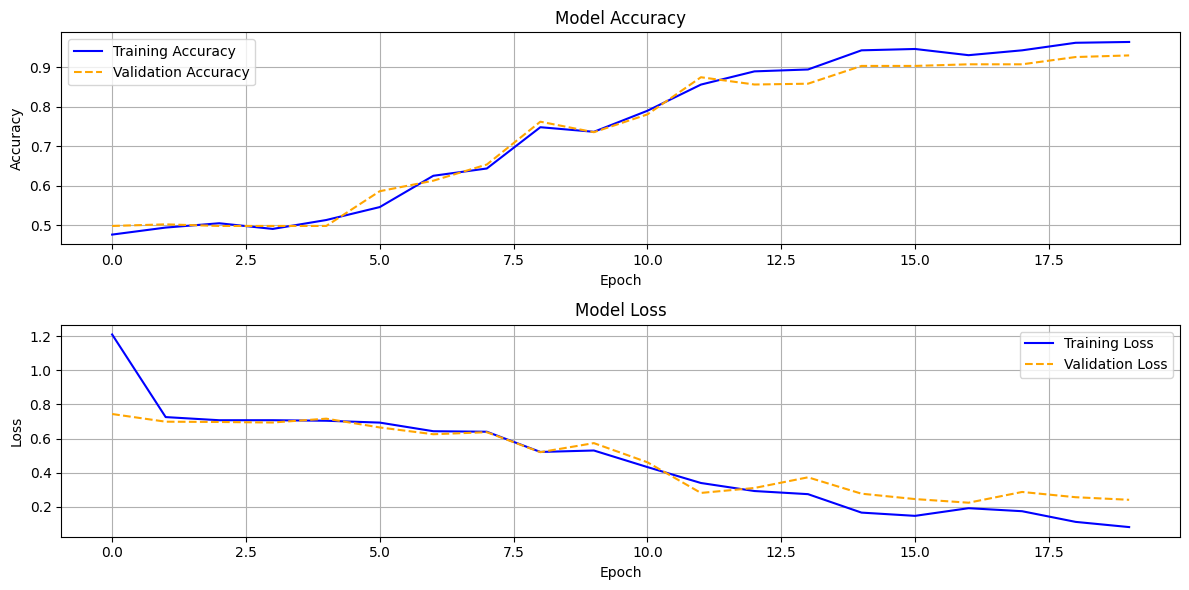

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Assuming 'hist' contains the history object returned by model.fit()
plot_history(hist)


In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

16/16 [==============================] - 0s 17ms/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest,ypred)

0.930327868852459

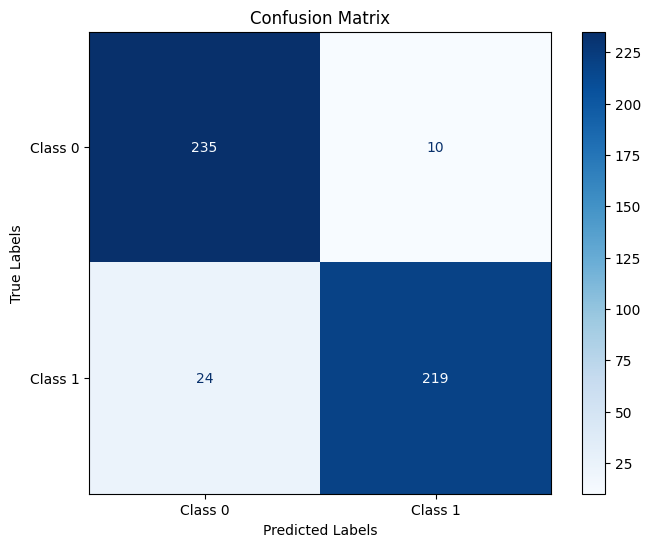

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming cf is the confusion matrix and ytest, ypred are true and predicted labels
cf = confusion_matrix(y_true=ytest, y_pred=ypred)

# Create ConfusionMatrixDisplay object
x = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=["Class 0", "Class 1"])  # Add display labels as needed

# Plot the confusion matrix with modifications
fig, ax = plt.subplots(figsize=(8, 6))
x.plot(ax=ax, cmap=plt.cm.Blues)  # Change cmap for a different color scheme
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.grid(False)
plt.show()


#Xception

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, concatenate

def dense_block(x, growth_rate, num_layers):
    for _ in range(num_layers):
        x1 = BatchNormalization()(x)
        x1 = Conv2D(growth_rate, kernel_size=(3,3), padding='same', activation='relu')(x1)
        x = concatenate([x, x1], axis=-1)
    return x

def transition_layer(x, compression_factor):
    num_channels = int(x.shape[-1])
    num_channels = int(num_channels * compression_factor)
    x = BatchNormalization()(x)
    x = Conv2D(num_channels, kernel_size=(1,1), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)
    return x

input_shape = (224, 224, 1)  # Change this to match your input shape
num_classes = 2  # Change this to match your number of classes

input_layer = Input(shape=input_shape)

# Initial convolution block
x = Conv2D(64, kernel_size=(7,7), strides=(2,2), padding='same', activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

# Dense blocks and transition layers
growth_rate = 32  # Hyperparameter, you can adjust this
num_layers = [6, 12, 24, 16]  # Number of layers in each dense block
compression_factor = 0.5  # Hyperparameter, you can adjust this

for num_layer in num_layers:
    x = dense_block(x, growth_rate, num_layer)
    x = transition_layer(x, compression_factor)

# Final dense block
x = dense_block(x, growth_rate, 8)  # Adjust the number of layers as needed

# Classification head
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=x)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()  # Print model summary


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_27 (InputLayer)       [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_631 (Conv2D)         (None, 112, 112, 64)         3200      ['input_27[0][0]']            
                                                                                                  
 max_pooling2d_144 (MaxPool  (None, 56, 56, 64)           0         ['conv2d_631[0][0]']          
 ing2D)                                                                                           
                                                                                                  
 batch_normalization_84 (Ba  (None, 56, 56, 64)           256       ['max_pooling2d_144[0][0

In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
46/46 [==============================] - 99s 679ms/step - loss: 1.2305 - accuracy: 0.5691 - val_loss: 308.1535 - val_accuracy: 0.5020
Epoch 2/20
46/46 [==============================] - 13s 287ms/step - loss: 0.5560 - accuracy: 0.7237 - val_loss: 21.0138 - val_accuracy: 0.5020
Epoch 3/20
46/46 [==============================] - 13s 288ms/step - loss: 0.4915 - accuracy: 0.7613 - val_loss: 0.8780 - val_accuracy: 0.6004
Epoch 4/20
46/46 [==============================] - 13s 288ms/step - loss: 0.4094 - accuracy: 0.8140 - val_loss: 0.5522 - val_accuracy: 0.7500
Epoch 5/20
46/46 [==============================] - 13s 285ms/step - loss: 0.3616 - accuracy: 0.8468 - val_loss: 0.6095 - val_accuracy: 0.7090
Epoch 6/20
46/46 [==============================] - 13s 290ms/step - loss: 0.2460 - accuracy: 0.9029 - val_loss: 0.6313 - val_accuracy: 0.8012
Epoch 7/20
46/46 [==============================] - 13s 290ms/step - loss: 0.1859 - accuracy: 0.9275 - val_loss: 0.6376 - val_accuracy: 0.8

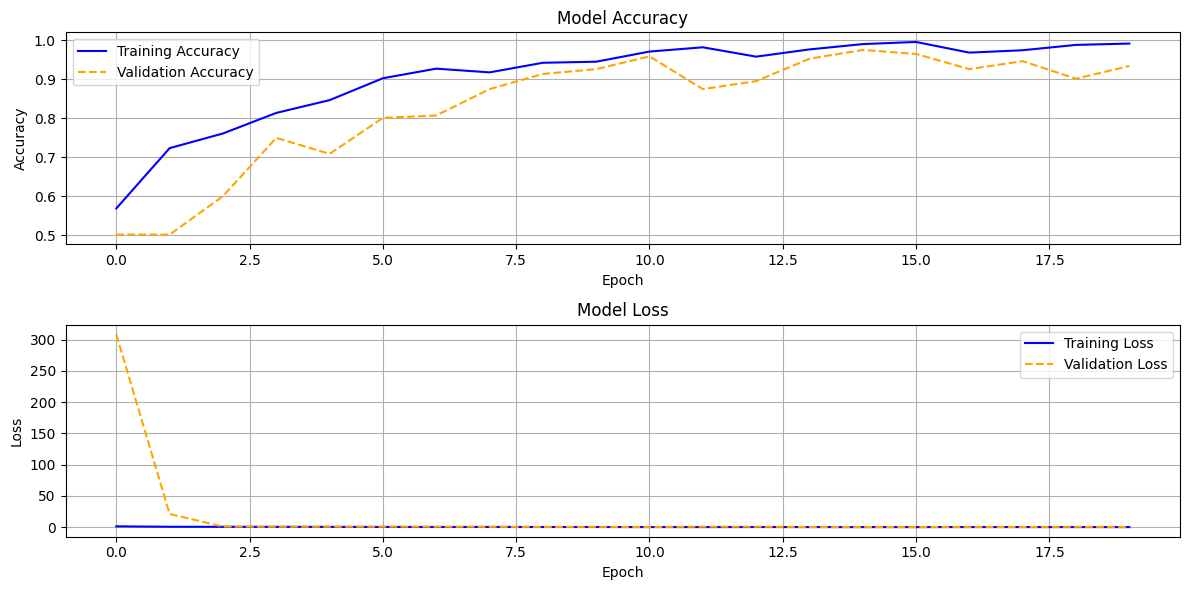

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Assuming 'hist' contains the history object returned by model.fit()
plot_history(hist)


In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

16/16 [==============================] - 3s 76ms/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest,ypred)

0.9344262295081968

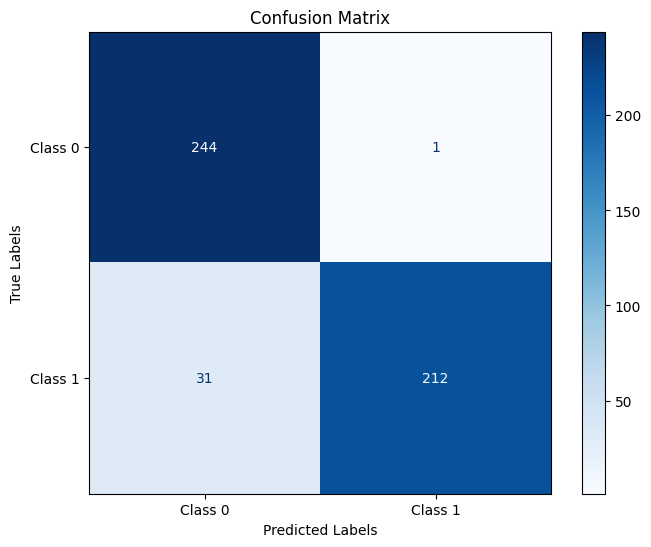

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming cf is the confusion matrix and ytest, ypred are true and predicted labels
cf = confusion_matrix(y_true=ytest, y_pred=ypred)

# Create ConfusionMatrixDisplay object
x = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=["Class 0", "Class 1"])  # Add display labels as needed

# Plot the confusion matrix with modifications
fig, ax = plt.subplots(figsize=(8, 6))
x.plot(ax=ax, cmap=plt.cm.Blues)  # Change cmap for a different color scheme
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.grid(False)
plt.show()


# DenseNet


In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from keras.layers import GlobalAveragePooling2D, Reshape, Multiply, Add
from keras import backend as K

def squeeze_excite_block(inputs, ratio=16):
    channels = K.int_shape(inputs)[-1]

    # Squeeze operation
    se = GlobalAveragePooling2D()(inputs)
    se = Dense(channels // ratio, activation='relu')(se)
    se = Dense(channels, activation='sigmoid')(se)
    se = Reshape((1, 1, channels))(se)  # Reshape to match input shape

    # Excitation operation
    x = Multiply()([inputs, se])
    return x

def conv_block(x, filters, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding=padding)(x)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    return x

def se_net(input_shape=(224, 224, 1), num_classes=4):
    inputs = Input(shape=input_shape)

    # Initial convolution block
    x = conv_block(inputs, filters=64, kernel_size=(7, 7), strides=(2, 2))
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Convolution blocks with SE blocks
    filters = 64
    for _ in range(3):
        x = conv_block(x, filters=filters)
        x = squeeze_excite_block(x)
        x = conv_block(x, filters=filters * 2, strides=(2, 2))
        filters *= 2

    # Flatten and fully connected layers
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Define input shape and number of classes
input_shape = (224, 224, 1)  # Change this to match your input shape
num_classes = 2 # Change this to match your number of classes

# Create SENet model
model = se_net(input_shape=input_shape, num_classes=num_classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()  # Print model summary


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_28 (InputLayer)       [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_702 (Conv2D)         (None, 112, 112, 64)         3200      ['input_28[0][0]']            
                                                                                                  
 batch_normalization_155 (B  (None, 112, 112, 64)         256       ['conv2d_702[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_86 (Activation)  (None, 112, 112, 64)         0         ['batch_normalization_15

In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
46/46 [==============================] - 12s 64ms/step - loss: 0.7535 - accuracy: 0.5663 - val_loss: 1.0303 - val_accuracy: 0.5020
Epoch 2/20
46/46 [==============================] - 2s 54ms/step - loss: 0.5263 - accuracy: 0.7401 - val_loss: 1.1429 - val_accuracy: 0.5020
Epoch 3/20
46/46 [==============================] - 3s 57ms/step - loss: 0.3400 - accuracy: 0.8543 - val_loss: 0.7179 - val_accuracy: 0.6516
Epoch 4/20
46/46 [==============================] - 3s 55ms/step - loss: 0.2869 - accuracy: 0.8789 - val_loss: 1.9287 - val_accuracy: 0.5328
Epoch 5/20
46/46 [==============================] - 2s 54ms/step - loss: 0.2201 - accuracy: 0.9152 - val_loss: 3.7643 - val_accuracy: 0.5020
Epoch 6/20
46/46 [==============================] - 2s 52ms/step - loss: 0.1206 - accuracy: 0.9555 - val_loss: 0.5421 - val_accuracy: 0.7869
Epoch 7/20
46/46 [==============================] - 3s 55ms/step - loss: 0.1182 - accuracy: 0.9521 - val_loss: 0.7141 - val_accuracy: 0.7889
Epoch 8/20
4

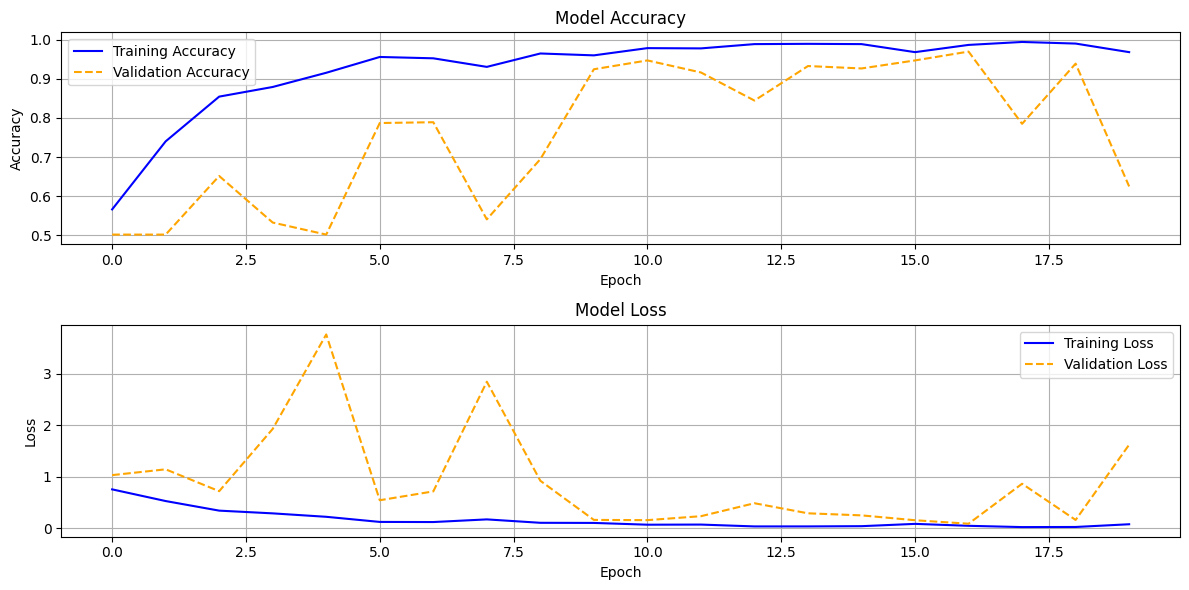

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Assuming 'hist' contains the history object returned by model.fit()
plot_history(hist)


In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

16/16 [==============================] - 1s 17ms/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest,ypred)

0.625

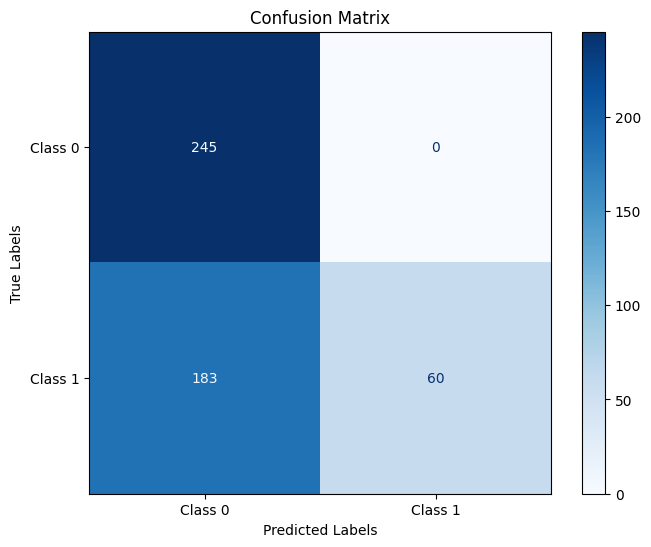

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming cf is the confusion matrix and ytest, ypred are true and predicted labels
cf = confusion_matrix(y_true=ytest, y_pred=ypred)

# Create ConfusionMatrixDisplay object
x = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=["Class 0", "Class 1"])  # Add display labels as needed

# Plot the confusion matrix with modifications
fig, ax = plt.subplots(figsize=(8, 6))
x.plot(ax=ax, cmap=plt.cm.Blues)  # Change cmap for a different color scheme
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.grid(False)
plt.show()


# ZFNet

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# First convolutional layer
model.add(Conv2D(96, kernel_size=(7, 7), strides=(2, 2), activation='relu', input_shape=(224, 224, 1)))

# Max pooling layer
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Second convolutional layer
model.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))

# Max pooling layer
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Third convolutional layer
model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))

# Fourth convolutional layer
model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))

# Fifth convolutional layer
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))

# Max pooling layer
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layers
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Change num_classes according to your task

model.summary()  # Display model summary

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 109, 109, 96)      4800      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 54, 54, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 50, 50, 256)       614656    
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 24, 24, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 22, 22, 384)       885120    
                                                                 
 conv2d_29 (Conv2D)          (None, 20, 20, 384)      

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
46/46 [==============================] - 8s 105ms/step - loss: 40.6520 - accuracy: 0.4945 - val_loss: 0.6825 - val_accuracy: 0.5164
Epoch 2/20
46/46 [==============================] - 4s 92ms/step - loss: 0.6794 - accuracy: 0.5855 - val_loss: 0.6591 - val_accuracy: 0.6373
Epoch 3/20
46/46 [==============================] - 5s 101ms/step - loss: 0.6659 - accuracy: 0.6088 - val_loss: 0.6324 - val_accuracy: 0.6557
Epoch 4/20
46/46 [==============================] - 4s 92ms/step - loss: 0.6118 - accuracy: 0.6621 - val_loss: 0.6228 - val_accuracy: 0.6352
Epoch 5/20
46/46 [==============================] - 4s 89ms/step - loss: 0.6064 - accuracy: 0.6751 - val_loss: 0.6646 - val_accuracy: 0.6209
Epoch 6/20
46/46 [==============================] - 4s 90ms/step - loss: 0.5593 - accuracy: 0.7079 - val_loss: 0.5504 - val_accuracy: 0.7295
Epoch 7/20
46/46 [==============================] - 4s 92ms/step - loss: 0.4834 - accuracy: 0.7784 - val_loss: 0.6080 - val_accuracy: 0.7049
Epoch 8/20

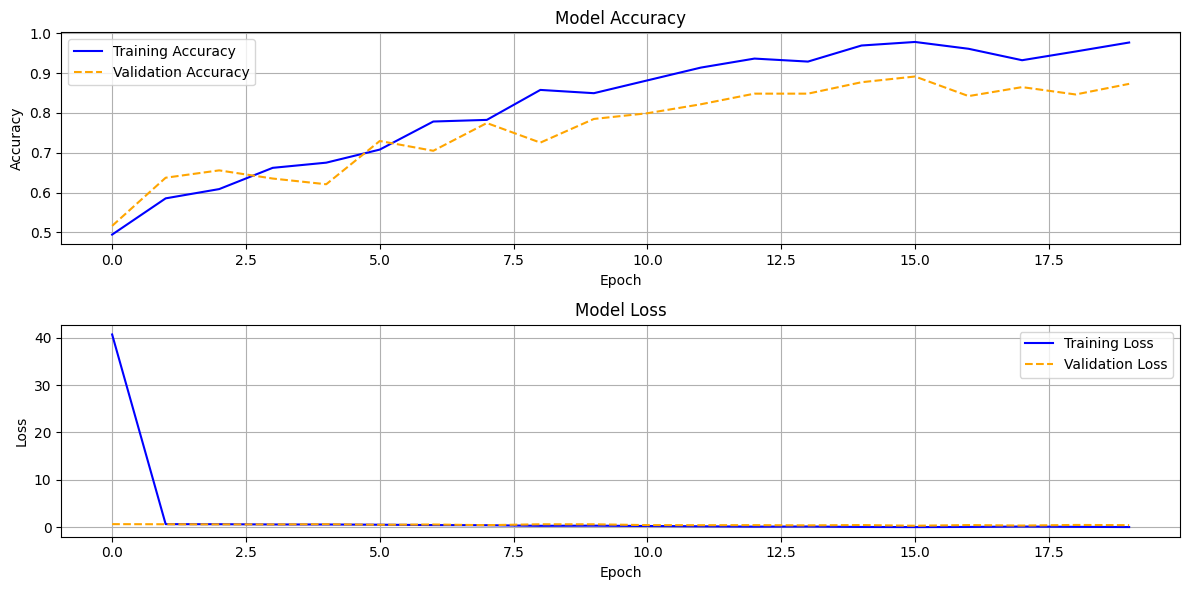

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Assuming 'hist' contains the history object returned by model.fit()
plot_history(hist)


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

16/16 [==============================] - 0s 23ms/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
accuracy_score(ytest,ypred)

0.8729508196721312

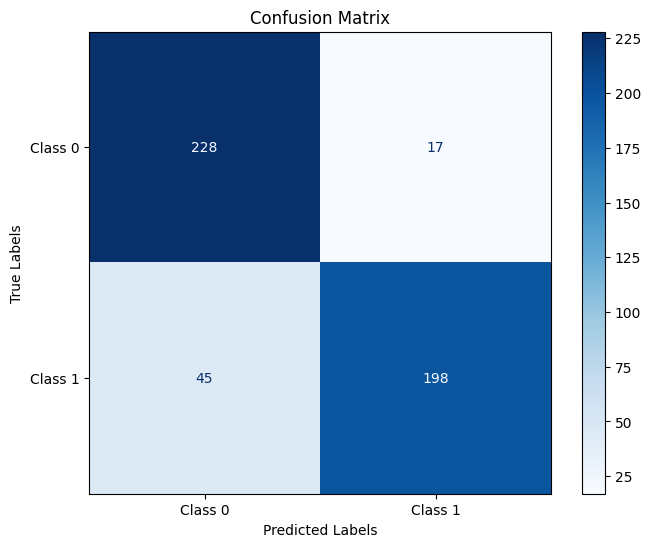

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming cf is the confusion matrix and ytest, ypred are true and predicted labels
cf = confusion_matrix(y_true=ytest, y_pred=ypred)

# Create ConfusionMatrixDisplay object
x = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=["Class 0", "Class 1"])  # Add display labels as needed

# Plot the confusion matrix with modifications
fig, ax = plt.subplots(figsize=(8, 6))
x.plot(ax=ax, cmap=plt.cm.Blues)  # Change cmap for a different color scheme
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.grid(False)
plt.show()


# LeNet-5

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# First convolutional layer
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layers
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Adjust the number of classes according to your task

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()  # Display model summary


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 220, 220, 6)       156       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 110, 110, 6)       0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 53, 53, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 44944)             0         
                                                                 
 dense_17 (Dense)            (None, 120)              

In [ ]:
hist = model.fit(xtrain,ytrain,epochs = 20,batch_size = 32,validation_data = (xtest,ytest))

Epoch 1/20
46/46 [==============================] - 2s 20ms/step - loss: 10.6157 - accuracy: 0.6238 - val_loss: 0.4413 - val_accuracy: 0.8033
Epoch 2/20
46/46 [==============================] - 1s 15ms/step - loss: 0.2766 - accuracy: 0.9056 - val_loss: 0.2122 - val_accuracy: 0.9385
Epoch 3/20
46/46 [==============================] - 1s 15ms/step - loss: 0.0945 - accuracy: 0.9795 - val_loss: 0.1505 - val_accuracy: 0.9447
Epoch 4/20
46/46 [==============================] - 1s 15ms/step - loss: 0.0266 - accuracy: 0.9945 - val_loss: 0.1166 - val_accuracy: 0.9570
Epoch 5/20
46/46 [==============================] - 1s 15ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.1367 - val_accuracy: 0.9549
Epoch 6/20
46/46 [==============================] - 1s 16ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.1175 - val_accuracy: 0.9611
Epoch 7/20
46/46 [==============================] - 1s 16ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1280 - val_accuracy: 0.9549
Epoch 8/20
4

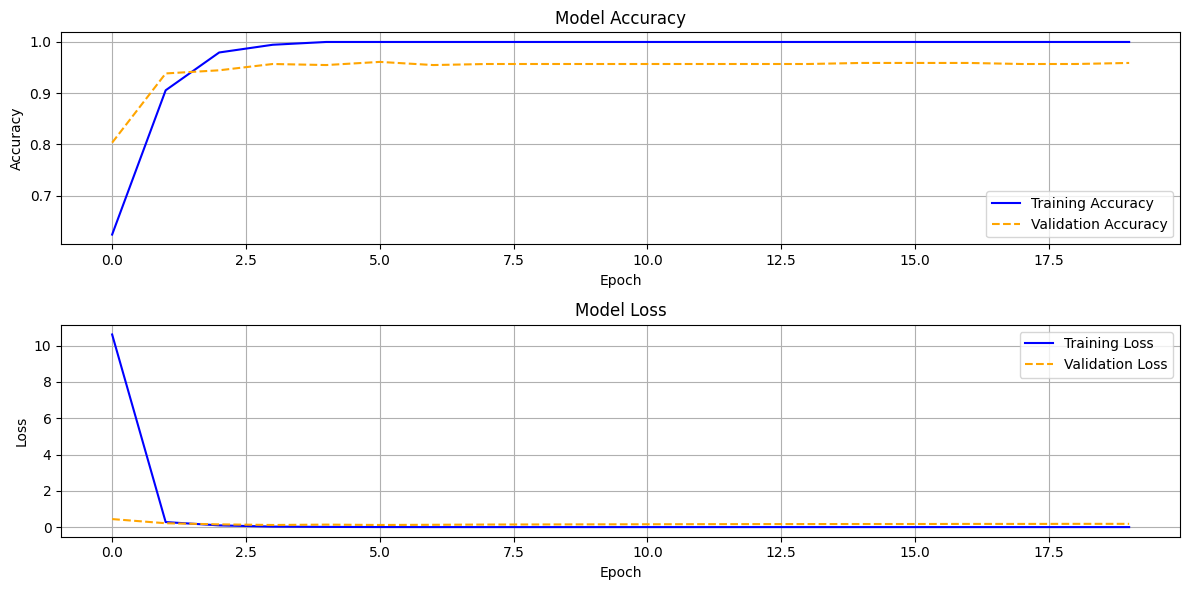

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Assuming 'hist' contains the history object returned by model.fit()
plot_history(hist)


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
img = np.reshape(xtest,(-1,1,224,224))
res = model.predict(xtest)

16/16 [==============================] - 0s 5ms/step


In [ ]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [ ]:
accuracy_score(ytest,ypred)

0.9590163934426229

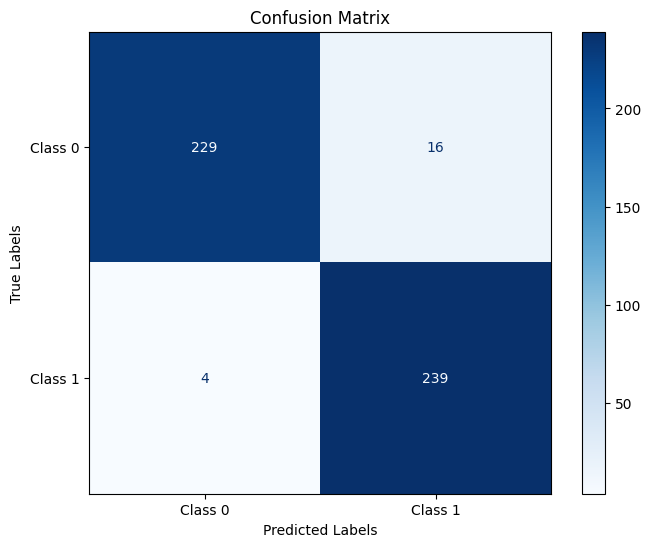

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming cf is the confusion matrix and ytest, ypred are true and predicted labels
cf = confusion_matrix(y_true=ytest, y_pred=ypred)

# Create ConfusionMatrixDisplay object
x = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=["Class 0", "Class 1"])  # Add display labels as needed

# Plot the confusion matrix with modifications
fig, ax = plt.subplots(figsize=(8, 6))
x.plot(ax=ax, cmap=plt.cm.Blues)  # Change cmap for a different color scheme
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.grid(False)
plt.show()


# Model Accuracy Comparision

Accuracy values:
AlexNet: 96.92%
ResNet-18: 94.46%
GoogleNet: 58.6%
VGG-16: 93.032%
Inception V3: 95.696%
SqueezeNet: 93.27%
Xception: 93.44%
DenseNet: 62.5%
ZFNet: 87.29%
LeNet-5: 95.9%


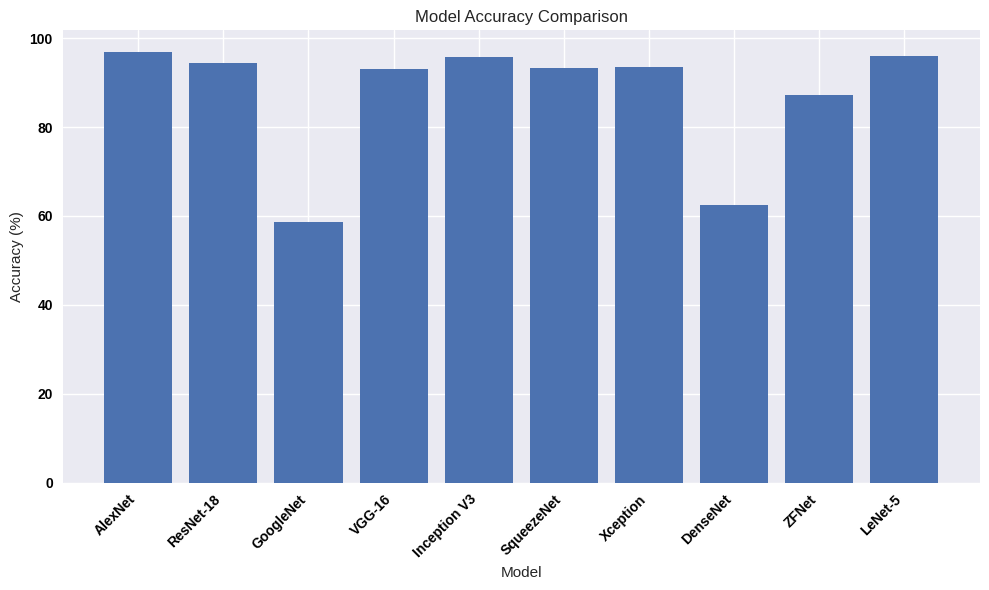

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Models
models = ['AlexNet', 'ResNet-18', 'GoogleNet', 'VGG-16',  'Inception V3', 'SqueezeNet', 'Xception', 'DenseNet', 'ZFNet' , 'LeNet-5']

# Accuracy values
accuracy = [96.92, 94.46, 58.60, 93.032, 95.696, 93.27, 93.44, 62.5, 87.29, 95.90]

# Print accuracy values
print("Accuracy values:")
for model, acc in zip(models, accuracy):
    print(f"{model}: {acc}%")

# Use Seaborn's color palette
sns.set_palette("pastel")

# Plotting
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')  # Use Seaborn style without black background

# Accuracy plot
bars = plt.bar(models, accuracy)
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Customizing ticks and labels
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


Loss values:
AlexNet: 0.15
ResNet-18: 0.2
GoogleNet: 1.5
VGG-16: 0.18
Inception V3: 0.13
SqueezeNet: 0.21
Xception: 0.2
DenseNet: 1.4
ZFNet: 0.35
LeNet-5: 0.16


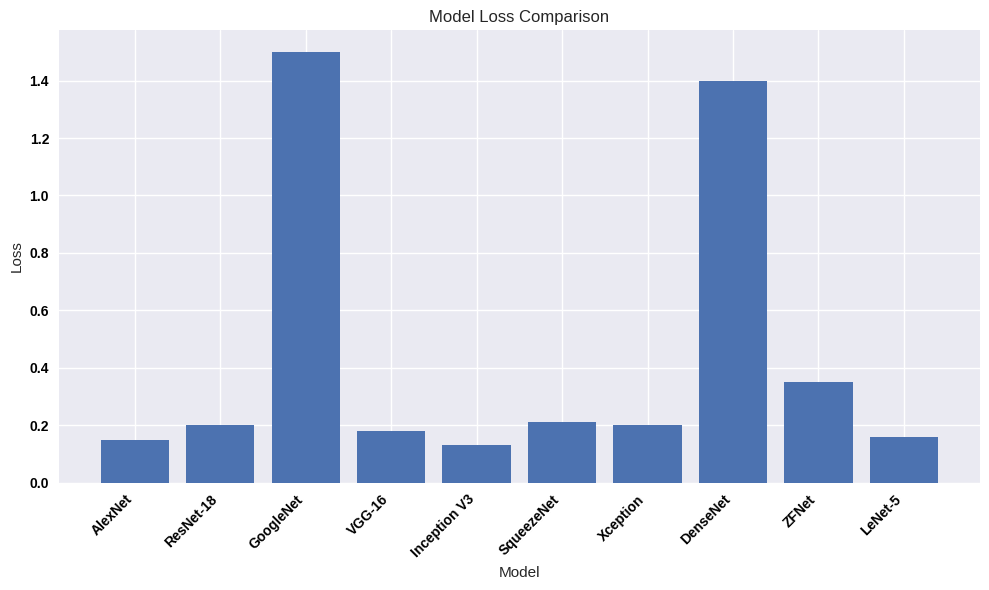

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Models
models = ['AlexNet', 'ResNet-18', 'GoogleNet', 'VGG-16',  'Inception V3', 'SqueezeNet', 'Xception', 'DenseNet', 'ZFNet' , 'LeNet-5']

# Loss values
loss = [0.15, 0.20, 1.50, 0.18, 0.13, 0.21, 0.20, 1.40, 0.35, 0.16]

# Print loss values
print("Loss values:")
for model, l in zip(models, loss):
    print(f"{model}: {l}")

# Use Seaborn's color palette
sns.set_palette("pastel")

# Plotting
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')  # Use Seaborn style without black background

# Loss plot
bars = plt.bar(models, loss)
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Model Loss Comparison')

# Customizing ticks and labels
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


Accuracy values:
AlexNet: 96.92%
ResNet-18: 94.46%
GoogleNet: 58.6%
VGG-16: 93.032%
Inception V3: 95.696%
SqueezeNet: 93.27%
Xception: 93.44%
DenseNet: 62.5%
ZFNet: 87.29%
LeNet-5: 95.9%


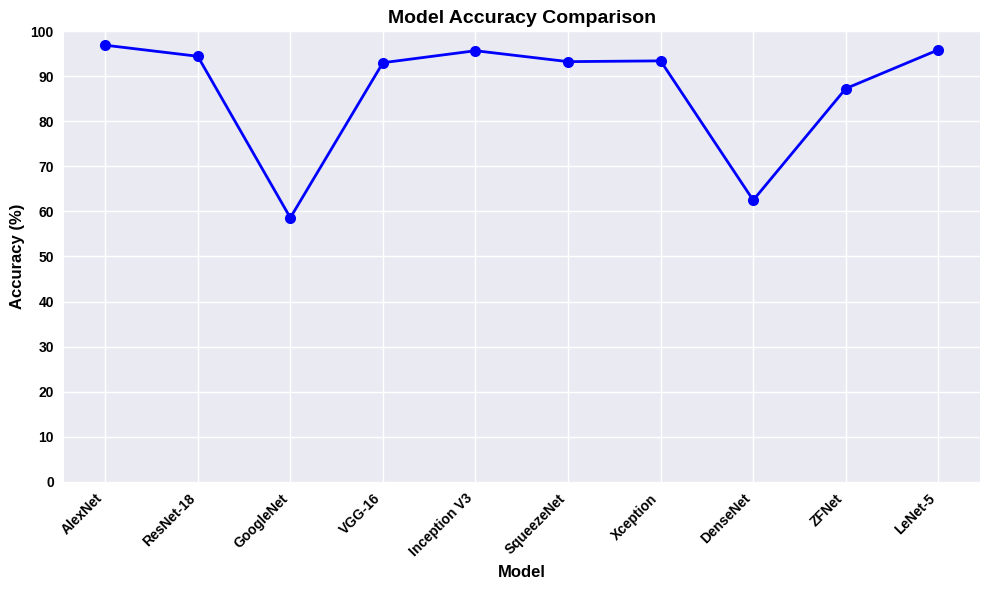

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Models
models = ['AlexNet', 'ResNet-18', 'GoogleNet', 'VGG-16',  'Inception V3', 'SqueezeNet', 'Xception', 'DenseNet', 'ZFNet' , 'LeNet-5']

# Accuracy values
accuracy = [96.92, 94.46, 58.60, 93.032, 95.696, 93.27, 93.44, 62.5, 87.29, 95.90]

# Print accuracy values
print("Accuracy values:")
for model, acc in zip(models, accuracy):
    print(f"{model}: {acc}%")

# Use Seaborn's color palette
sns.set_palette("pastel")

# Plotting
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')  # Use Seaborn style without black background

# Line plot for accuracy
plt.plot(models, accuracy, marker='o', color='b', markersize=8, linewidth=2)

# Customizing ticks, labels, and limits
plt.xlabel('Model', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold', color='black')
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold', color='black')
plt.yticks(np.arange(0, 101, 10), fontsize=10, fontweight='bold', color='black')  # Set y-axis ticks from 0 to 100
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100

plt.tight_layout()
plt.show()


Loss values:
AlexNet: 0.15
ResNet-18: 0.2
GoogleNet: 1.5
VGG-16: 0.18
Inception V3: 0.13
SqueezeNet: 0.21
Xception: 0.2
DenseNet: 1.4
ZFNet: 0.35
LeNet-5: 0.16


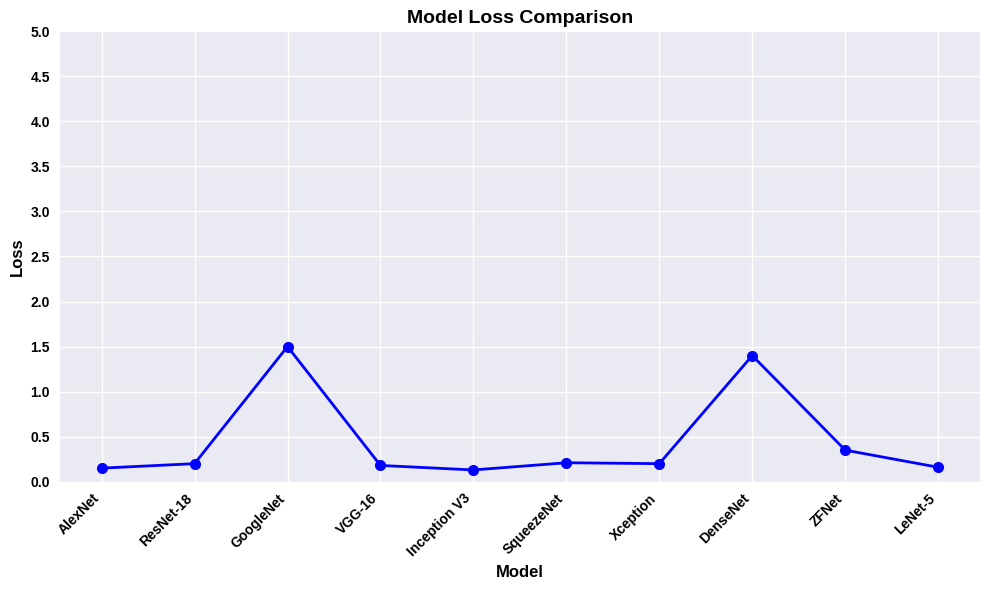

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Models
models = ['AlexNet', 'ResNet-18', 'GoogleNet', 'VGG-16',  'Inception V3', 'SqueezeNet', 'Xception', 'DenseNet', 'ZFNet' , 'LeNet-5']

# Loss values
loss = [0.15, 0.20, 1.50, 0.18, 0.13, 0.21, 0.20, 1.40, 0.35, 0.16]

# Print loss values
print("Loss values:")
for model, l in zip(models, loss):
    print(f"{model}: {l}")

# Use Seaborn's color palette
sns.set_palette("pastel")

# Plotting
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')  # Use Seaborn style without black background

# Line plot for loss
plt.plot(models, loss, marker='o', color='b', markersize=8, linewidth=2)

# Customizing ticks, labels, and limits
plt.xlabel('Model', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Loss', fontsize=12, fontweight='bold', color='black')
plt.title('Model Loss Comparison', fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold', color='black')
plt.yticks(np.arange(0, 5.5, 0.5), fontsize=10, fontweight='bold', color='black')  # Set y-axis ticks from 0 to 5
plt.ylim(0, 5)  # Set y-axis limits from 0 to 5

plt.tight_layout()
plt.show()
